In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from src.parameters import STATE_ORDER, STATE_COLORS
from src.figure_utilities import PAGE_HEIGHT, ONE_COLUMN, set_figure_defaults, save_figure
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os


set_figure_defaults()

In [3]:
from src.analysis import load_all_replay_info
from src.parameters import PROBABILITY_THRESHOLD


replay_info = load_all_replay_info(
    n_unique_spiking=2,
    data_type="clusterless",
    dim="1D",
    probability_threshold=PROBABILITY_THRESHOLD,
    speed_threshold=4,
    exclude_interneuron_spikes=False,
)

In [4]:
from src.parameters import PROCESSED_DATA_DIR
import os
import glob
import pandas as pd

file_paths = glob.glob(os.path.join(PROCESSED_DATA_DIR, '*_radon_info.csv'))
radon_info = pd.concat(
    [pd.read_csv(file_path) for file_path in file_paths], axis=0,
).set_index(["animal", "day", "epoch", "ripple_number"])

radon_info = radon_info.rename(index={"Cor": "cor"}).rename_axis(
        index={"animal": "Animal ID"}
    )

In [5]:
radon_info

radon_speed  radon_score  radon_pvalue  \
Animal ID day epoch ripple_number                                           
gov       13  2     1                 0.000000     0.189614      0.425574   
                    2                75.990767     0.180578      0.633367   
                    3                 0.000000     0.167528      0.249750   
                    4               116.115274     0.212479      0.945055   
                    5               872.323591     0.167072      0.860140   
...                                        ...          ...           ...   
con       3   2     103            2071.164208     0.360891      0.588412   
                    104             781.432267     0.247513      0.585415   
                    105            2071.164208     0.541963      0.531469   
                    106            2071.164208     0.282525      0.467532   
                    107            1504.116126     0.154870      0.992008   

                                   isotonic_speed  isotonic_score  \
Animal ID day epoch ripple_number                                   
gov       13  2     1                    0.000000        1.000000   
                    2                    0.000000        1.000000   
                    3                  437.930717        1.000000   
                    4                    0.000000        1.000000   
                    5                   24.329484        0.033855   
...                                           ...             ...   
con       3   2     103               4180.258955        0.999338   
                    104                115.863928        0.201245   
                    105                434.489730        1.000000   
                    106                687.942073        0.973685   
                    107               1918.665167        0.791152   

                                   isotonic_pvalue  linear_speed  \
Animal ID day epoch ripple_number                                  
gov       13  2     1                     0.001998    589.145273   
                    2                     0.000999    167.337527   
                    3                     0.000999    221.962413   
                    4                     0.032967    275.948170   
                    5                     1.000000    366.535979   
...                                            ...           ...   
con       3   2     103                   0.516484   2293.344460   
                    104                   0.944056    238.980768   
                    105                   0.999001    957.563813   
                    106                   0.271728   1362.137985   
                    107                   0.536464    217.267711   

                                   linear_score  linear_pvalue    map_speed  \
Animal ID day epoch ripple_number                                             
gov       13  2     1                  0.154316       0.270729  3622.100000   
                    2                  0.037841       0.774226  1356.182068   
                    3                  0.165396       0.118881  3203.534073   
                    4                  0.084818       0.720280  2198.771984   
                    5                  0.063055       0.427572  3591.156420   
...                                         ...            ...          ...   
con       3   2     103                0.327363       0.133866  5223.971932   
                    104                0.074223       0.696304   283.715415   
                    105                0.066660       0.962038   440.045538   
                    106                0.423217       0.128871  1619.404786   
                    107                0.007856       0.952048  4648.933128   

                                   map_score  map_pvalue  
Animal ID day epoch ripple_number                         
gov       13  2     1               0.366621    0.302697  
                    2               0.307621 

In [6]:
radon_info.shape[0], replay_info.shape[0]

(26195, 26159)

In [7]:
replay_info = pd.concat((replay_info, radon_info), axis=1).loc[replay_info.index]

In [8]:
from src.parameters import PROCESSED_DATA_DIR
import os


replay_info.to_csv(os.path.join(PROCESSED_DATA_DIR, "replay_info_80.csv"))
replay_info

start_time  \
Animal ID day epoch ripple_number                              
cor       1   2     1              0 days 00:22:39.771534985   
                    2              0 days 00:23:00.114870107   
                    3              0 days 00:23:16.240204859   
                    4              0 days 00:23:21.014871945   
                    5              0 days 00:23:21.862205353   
...                                                      ...   
remy      37  4     297            0 days 01:48:51.756666666   
                    298            0 days 01:48:52.121999999   
                    299            0 days 01:48:55.523999999   
                    300            0 days 01:48:56.427333333   
                    301            0 days 01:48:57.831333333   

                                                    end_time  duration  \
Animal ID day epoch ripple_number                                        
cor       1   2     1              0 days 00:22:39.809534988  0.038000   
                    2              0 days 00:23:00.142870110  0.028000   
                    3              0 days 00:23:16.308871531  0.068667   
                    4              0 days 00:23:21.102871953  0.088000   
                    5              0 days 00:23:21.910205357  0.048000   
...                                                      ...       ...   
remy      37  4     297            0 days 01:48:51.840666666  0.084000   
                    298            0 days 01:48:52.191999999  0.070000   
                    299            0 days 01:48:55.604666666  0.080667   
                    300            0 days 01:48:56.514666666  0.087333   
                    301            0 days 01:48:57.919333333  0.088000   

                                  is_classified  n_unique_spiking  \
Animal ID day epoch ripple_number                                   
cor       1   2     1                      True              10.0   
                    2                      True               5.0   
                    3                      True               9.0   
                    4                      True               9.0   
                    5                      True               9.0   
...                                         ...               ...   
remy      37  4     297                    True              19.0   
                    298                   False              18.0   
                    299                    True              19.0   
                    300                    True              19.0   
                    301                    True              17.0   

                                   n_total_spikes  \
Animal ID day epoch ripple_number                   
cor       1   2     1                        21.0   
                    2                        11.0   
                    3                        33.0   
                    4                       115.0   
                    5                        34.0   
...                                           ...   
remy      37  4     297                     167.0   
                    298                     123.0   
                    299                     193.0   
                    300                     170.0   
                    301                     179.0   

                                   median_fraction_spikes_under_6_ms  \
Animal ID day epoch ripple_number                                      
cor       1   2     1                                       0.500000   
                    2                                       0.300000   
                    3                                       0.000000   
                    4                                       0.600000   
                    5                                       0.333333   
...                                                              ...   
remy      37  4     297                                     0.375000   
                  

In [9]:
from src.shuffle import Benjamini_Hochberg_procedure
Benjamini_Hochberg_procedure(replay_info.filter(like='pvalue', axis='columns').iloc[4])

array([False, False, False, False])

In [10]:
def plot_speed_by_classified_state(speed_type='radon', ylim_max=0.25):
    fig, axes = plt.subplots(len(STATE_ORDER) + 1, 1, sharex=True, sharey=True,
                             figsize=(ONE_COLUMN * 0.9,  0.9 * PAGE_HEIGHT / 2), constrained_layout=True)
    for ax, state in zip(axes.flat, STATE_ORDER):
        ax.hist(replay_info.loc[replay_info[state].fillna(False)][f"{speed_type}_speed"] / 100,
                 color=STATE_COLORS[state],
                 bins=np.arange(0, 45, 1),
                 density=True)
    axes[-1].hist(replay_info[f"{speed_type}_speed"] / 100,
             bins=np.arange(0, 45, 1),
             density=True,
             color='black'
            )
    plt.xlim((0, 45))
    plt.ylim((0, ylim_max))
    plt.yticks((0, ylim_max))
    axes[-1].set_xlabel('Estimated Speed [m/s]')
    axes[0].set_title(speed_type.capitalize())
    sns.despine(offset=5)

In [11]:
def plot_score_by_classified_state(speed_type='radon'):
    fig, axes = plt.subplots(len(STATE_ORDER) + 1, 1, sharex=True, sharey=True,
                             figsize=(ONE_COLUMN * 0.9,  0.9 * PAGE_HEIGHT / 2), constrained_layout=True)
    for ax, state in zip(axes.flat, STATE_ORDER):
        ax.hist(np.abs(replay_info.loc[replay_info[state].fillna(False)][f"{speed_type}_score"]),
                color=STATE_COLORS[state],
                bins=np.arange(0, 1.1, 0.1),
                density=True,
               )
    axes[-1].hist(replay_info[f"{speed_type}_score"],
         density=True,
        bins=np.arange(0, 1.1, 0.1),
         color='black'
        )
    axes[-1].set_xlabel(f'{speed_type.capitalize()} score')
    axes[0].set_title(speed_type.capitalize())
    plt.xlim((0, 1))
    sns.despine(offset=5)
    

## Radon

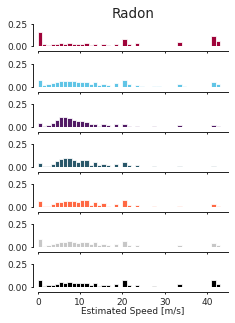

In [12]:
plot_speed_by_classified_state('radon')
save_figure(os.path.join("Figure6", "figure6_radon_speed"))

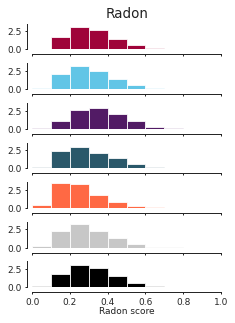

In [13]:
plot_score_by_classified_state('radon')
save_figure(os.path.join("Figure6", "figure6_radon_score"))

## MAP

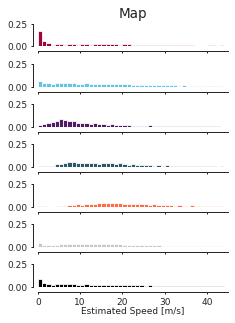

In [14]:
plot_speed_by_classified_state('map')
save_figure(os.path.join("Figure6", "figure6_map_speed"))

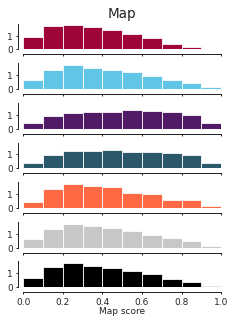

In [15]:
plot_score_by_classified_state('map')
save_figure(os.path.join("Figure5-supplemental4", "figure5_map_score"))

## Linear

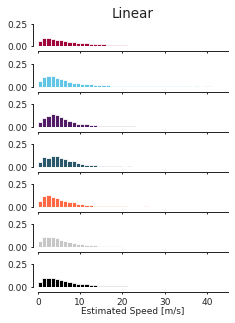

In [16]:
plot_speed_by_classified_state('linear')
save_figure(os.path.join("Figure6", "figure6_linear_speed"))

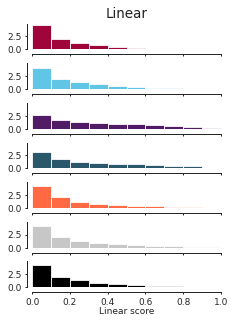

In [18]:
plot_score_by_classified_state('linear')
save_figure(os.path.join("Figure6", "figure6_linear_score"))

## Isotonic Regression

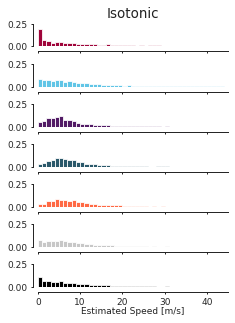

In [19]:
plot_speed_by_classified_state('isotonic')
save_figure(os.path.join("Figure6", "figure6_isotonic_speed"))

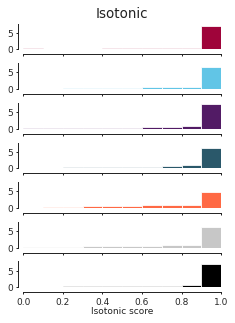

In [20]:
plot_score_by_classified_state('isotonic')
save_figure(os.path.join("Figure6", "figure6_isotonic_score"))

## Classifier

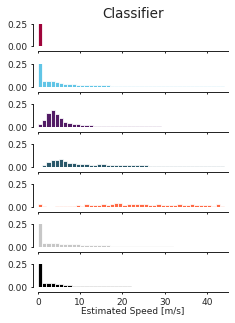

In [21]:
plot_speed_by_classified_state('replay')
plt.gcf().axes[0].set_title('Classifier')
save_figure(os.path.join("Figure6", "figure6_classifier_speed"))

# Number of Ripples per State

Text(0.5, 0, 'Number of Ripples')

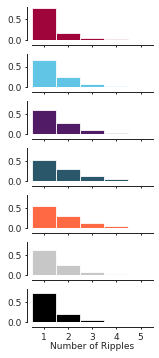

In [22]:
fig, axes = plt.subplots(len(STATE_ORDER) + 1, 1, sharex=True, sharey=True,
                         figsize=(ONE_COLUMN * 0.6,  PAGE_HEIGHT / 2), constrained_layout=True)
for ax, state in zip(axes.flat, STATE_ORDER):
    ax.hist(replay_info.loc[replay_info[state].fillna(False)].n_ripples,
             color=STATE_COLORS[state],
             bins=np.arange(0.5, 6.5, 1),
             density=True)
axes[-1].hist(replay_info.n_ripples,
             color="black",
             bins=np.arange(0.5, 6.5, 1),
             density=True);
plt.xticks(ticks=np.arange(1, 6), labels=np.arange(1, 6))
plt.xlim((0.5, 5.5))
sns.despine(offset=5)
plt.xlabel("Number of Ripples")

In [23]:
replay_info.loc[replay_info['Hover-Continuous-Mix'].fillna(False)].n_ripples

Animal ID  day  epoch  ripple_number
cor        1    2      1                1.0
                       3                1.0
                       5                1.0
                       6                1.0
                       7                1.0
                                       ... 
remy       37   4      293              1.0
                       295              1.0
                       296              1.0
                       297              2.0
                       301              1.0
Name: n_ripples, Length: 16106, dtype: float64

In [24]:
stat = replay_info['Hover'].fillna(False)
scm = replay_info['Hover-Continuous-Mix'].fillna(False)
cont = replay_info['Continuous'].fillna(False)
fcm = replay_info['Fragmented-Continuous-Mix'].fillna(False)
frag = replay_info['Fragmented'].fillna(False)

replay_info.loc[scm & ~(stat | cont | fcm | frag)].n_ripples.mean(), replay_info.loc[cont & ~(stat | scm | fcm | frag)].n_ripples.mean()

(1.3474645030425962, 1.2462941847206386)

In [26]:
from patsy import dmatrix, dmatrices
from statsmodels.api import families
from regularized_glm import penalized_IRLS

replay_info.loc[replay_info['Continuous'].fillna(False)].n_ripples

n_ripples, constant_dm = dmatrices(formula_like='n_ripples ~ 1', data=replay_info)
dynamics_dm = np.stack((
    np.ones((replay_info.shape[0])),
    replay_info['Hover-Continuous-Mix'].fillna(False).values,
    replay_info['Continuous'].fillna(False).values,
    ), axis=1)
dynamics_dm2 = np.stack((
    np.ones((replay_info.shape[0])),
    replay_info['Hover'].fillna(False).values,
    replay_info['Hover-Continuous-Mix'].fillna(False).values,
    replay_info['Continuous'].fillna(False).values,
    replay_info['Fragmented-Continuous-Mix'].fillna(False).values,
    replay_info['Fragmented'].fillna(False).values
    ), axis=1)

constant_model = penalized_IRLS(
        constant_dm, n_ripples, family=families.Poisson(),
        penalty=1e-10, tolerance=1E-10)

dynamics_model = penalized_IRLS(
        dynamics_dm, n_ripples, family=families.Poisson(),
        penalty=1e-10, tolerance=1E-10)

dynamics_model2 = penalized_IRLS(
        dynamics_dm2, n_ripples, family=families.Poisson(),
        penalty=1e-10, tolerance=1E-10)

In [27]:
np.exp(np.sum(dynamics_model.coefficients[[0, 2]])) - np.exp(np.sum(dynamics_model.coefficients[[0, 1]]))

-0.03395707570074924

In [28]:
np.exp(constant_model.coefficients)

1.3703123208073695

In [29]:
np.exp(dynamics_model.coefficients)

array([1.18832232, 1.19531477, 1.16673912])

In [30]:
np.exp(dynamics_model2.coefficients)

array([1.13885479, 1.02907925, 1.21142906, 1.14549867, 1.16481791,
       1.21199008])

In [31]:
np.exp(np.sum(dynamics_model2.coefficients[[0, 3]])) - np.exp(np.sum(dynamics_model2.coefficients[[0, 2]]))

-0.07508513785237758

In [32]:
dynamics_model2.coefficients[3] / dynamics_model2.coefficients[2]

0.7082354826492022

In [33]:
dynamics_model2.AIC, dynamics_model.AIC, constant_model.AIC

(array(65950.73373047), array(66169.9610255), array(66601.03362531))

In [204]:
import scipy.stats

scipy.stats.chi2.sf(
    dynamics_model.deviance - constant_model.deviance,
    df=np.abs(dynamics_model.degrees_of_freedom - constant_model.degrees_of_freedom))

1.0

In [34]:
import scipy.stats

scipy.stats.chi2.sf(
    dynamics_model2.deviance - constant_model.deviance,
    df=np.abs(dynamics_model2.degrees_of_freedom - constant_model.degrees_of_freedom))

1.0

In [35]:
scipy.stats.ranksums(replay_info.loc[replay_info['Hover-Continuous-Mix'].fillna(False)].n_ripples.values,
                     replay_info.loc[replay_info['Continuous'].fillna(False)].n_ripples.values)

RanksumsResult(statistic=-7.4602336843448835, pvalue=8.636915976835938e-14)

## Pvalues

<AxesSubplot:>

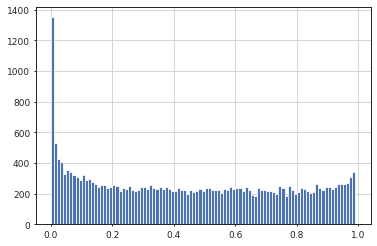

In [36]:
radon_info.radon_pvalue.hist(bins=np.arange(0, 1, .01))

In [48]:
{state: (replay_info.loc[replay_info.is_classified.astype(bool)].loc[replay_info[state]].radon_pvalue < 0.05).mean() * 100
 for state in STATE_ORDER}

{'Hover': 7.552954292084727,
 'Hover-Continuous-Mix': 13.988575686079722,
 'Continuous': 30.325870095322543,
 'Fragmented-Continuous-Mix': 31.18657298985168,
 'Fragmented': 15.269086357947433,
 'Unclassified': 17.054325955734406}

In [59]:
{state: (replay_info.loc[replay_info.is_classified.astype(bool)].loc[replay_info[state]].radon_pvalue < 0.05).sum()
 for state in STATE_ORDER}

{'Hover': 542,
 'Hover-Continuous-Mix': 2253,
 'Continuous': 1368,
 'Fragmented-Continuous-Mix': 799,
 'Fragmented': 244,
 'Unclassified': 2119}

In [61]:
{state: (replay_info.loc[replay_info.is_classified.astype(bool)].loc[replay_info[state]].radon_pvalue <= 1).sum()
 for state in STATE_ORDER}

{'Hover': 7176,
 'Hover-Continuous-Mix': 16106,
 'Continuous': 4511,
 'Fragmented-Continuous-Mix': 2562,
 'Fragmented': 1598,
 'Unclassified': 12425}

In [39]:
(replay_info.loc[~replay_info.is_classified.astype(bool)].radon_pvalue < 0.05).mean()

0.05797623334533669

In [50]:
(replay_info.loc[replay_info['Hover'] & (replay_info.Hover_duration > 0.100) & (replay_info.radon_speed < (6 / replay_info.Hover_duration))].radon_pvalue < 0.05).mean() * 100

28.040540540540544

In [51]:
(replay_info.loc[replay_info['Hover']].Hover_duration >= replay_info.loc[replay_info['Hover']].duration).mean() * 100

47.226867335562986

In [52]:
(replay_info.loc[replay_info['Hover-Continuous-Mix']]["Hover-Continuous-Mix_duration"] >=
 replay_info.loc[replay_info['Hover-Continuous-Mix']].duration).mean()

0.138023096982491

Text(0.5, 0, 'Speed [m/s]')

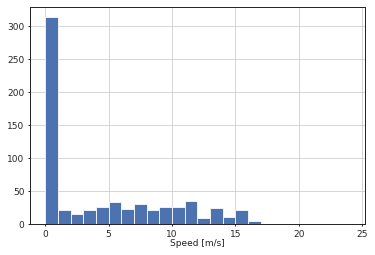

In [53]:
(replay_info.loc[replay_info['Hover'] & (replay_info.Hover_duration > 0.100)].radon_speed / 100).hist(bins=np.arange(0, 25))
plt.xlabel('Speed [m/s]')

<AxesSubplot:>

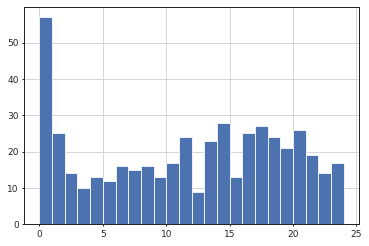

In [54]:
(replay_info.loc[replay_info['Hover'] & (replay_info.Hover_duration > 0.100)].map_speed / 100).hist(bins=np.arange(0, 25))

In [45]:
(replay_info.loc[replay_info.Hover].Hover_duration >= replay_info.loc[replay_info.Hover].duration).mean()

0.4722686733556299

In [55]:
replay_info.loc[replay_info.Hover].Hover_duration.median() * 1000

54.00000000000001

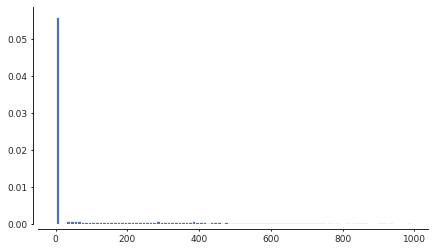

In [56]:
plt.figure(figsize=(7, 4))
plt.hist(np.asarray(replay_info[replay_info.is_classified].replay_speed), bins=np.arange(0, 1_000, 10), density=True);
sns.despine(offset=5)

<AxesSubplot:>

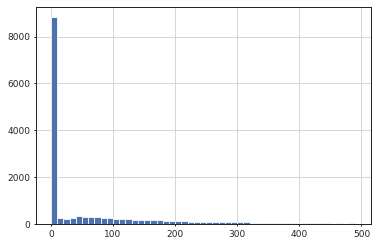

In [57]:
replay_info[replay_info.is_classified]["Hover-Continuous-Mix_replay_speed"].hist(bins=np.arange(0, 5_00, 10))

<AxesSubplot:>

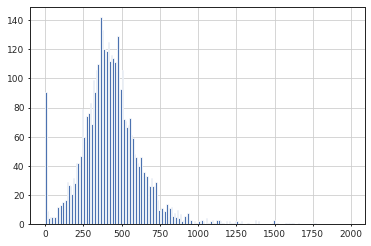

In [58]:
replay_info[replay_info.is_classified]["Continuous_replay_speed"].hist(bins=np.arange(0, 2_000, 10))

In [74]:
[replay_info.loc[replay_info[state]].n_ripples.median() for state in STATE_ORDER]

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [80]:
{state: np.round(replay_info.loc[replay_info[state]].n_ripples.mean(), decimals=1) for state in STATE_ORDER}

{'Hover': 1.3,
 'Hover-Continuous-Mix': 1.5,
 'Continuous': 1.6,
 'Fragmented-Continuous-Mix': 1.7,
 'Fragmented': 1.7,
 'Unclassified': 1.5}

In [86]:
np.percentile(replay_info.loc[replay_info['Hover']]['Hover_duration'], [25, 50, 75]) * 1000

array([38., 54., 74.])

In [87]:
np.percentile(replay_info.loc[replay_info['Hover']]['Hover_duration'], [25, 50, 75]) * 1000 / 24

array([1.58333333, 2.25      , 3.08333333])

In [66]:
np.mean(replay_info.radon_pvalue < 0.05) * 100

11.632707672311634

7.385603425207386

In [75]:
replay_info.loc[(replay_info.is_classified)]["Hover-Continuous-Mix_replay_distance_from_actual_position"].median()

49.81678584711361